<a href="https://colab.research.google.com/github/Sachini007/Data-Storm-3.0/blob/main/Semi_Finals_05_03_22/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install evidently 
!pip install pandas-profiling --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !cd '/gdrive/MyDrive/DataStorm 2022 Semi Finals'

In [ ]:
import pandas as pd

In [ ]:
train_orig = pd.read_csv('/content/drive/MyDrive/Data-Storm-3.0/Semi/train_promo.csv')
test_orig = pd.read_csv('/content/drive/MyDrive/Data-Storm-3.0/Semi/test_promo.csv')
val_orig = pd.read_csv('/content/drive/MyDrive/Data-Storm-3.0/Semi/val_promo.csv')

In [ ]:
train = train_orig.copy()
test = test_orig.copy()
val = val_orig.copy()

In [ ]:
train.head()

,DateID,CategoryCode,ItemCode,WeeklySales,DiscountValue,DiscountType,PromotionStartDate,PromotionEndDate
0,2021-10-01,category_1,3418,18,NaN,NaN,NaN,NaN
1,2021-10-01,category_1,3427,2,NaN,NaN,NaN,NaN
2,2021-10-01,category_1,17287,2,NaN,NaN,NaN,NaN
3,2021-10-01,category_1,17296,28,NaN,NaN,NaN,NaN
4,2021-10-01,category_1,24136,4,10.0,Percentage,2021-10-01,2021-10-07


In [ ]:
val.head()

,CategoryCode,ItemCode,OnPromo,WeeklySales,DateID,DiscountValue,DiscountType,PromotionStartDate,PromotionEndDate
0,category_2,1006090,0,9,2022-02-18,NaN,NaN,NaN,NaN
1,category_2,1105009,0,15,2022-02-18,NaN,NaN,NaN,NaN
2,category_2,1098502,0,7,2022-03-04,NaN,NaN,NaN,NaN
3,category_1,1081321,0,25,2022-03-04,NaN,NaN,NaN,NaN
4,category_4,1074823,0,24,2022-02-18,NaN,NaN,NaN,NaN


In [ ]:
#val.loc[val['OnPromo'] == 1]
val.query('DiscountType.notna()', engine='python')

,CategoryCode,ItemCode,OnPromo,WeeklySales,DateID,DiscountValue,DiscountType,PromotionStartDate,PromotionEndDate
60,category_2,30877,1,121,2022-02-25,10.0,Percentage,2022-02-25,2022-03-03
64,category_2,1090258,1,61,2022-03-04,10.0,Percentage,2022-03-04,2022-03-10
75,category_3,1066570,1,124,2022-02-25,15.0,Percentage,2022-02-25,2022-03-03
81,category_1,1085749,1,17,2022-02-18,10.0,Percentage,2022-02-18,2022-02-24
82,category_2,50785,1,72,2022-03-04,10.0,Percentage,2022-03-04,2022-03-10
89,category_2,1101571,1,17,2022-03-11,10.0,Percentage,2022-03-11,2022-03-17
100,category_2,1090258,1,27,2022-02-25,10.0,Percentage,2022-02-25,2022-03-03
123,category_2,50785,1,39,2022-02-18,10.0,Percentage,2022-02-18,2022-02-24
130,category_2,64978,1,22,2022-02-25,10.0,Percentage,2022-02-25,2022-03-03
140,category_3,1066570,1,41,2022-03-11,15.0,Percentage,2022-03-11,2022-03-17


In [ ]:
test.head()

,CategoryCode,ItemCode,OnPromo,DateID,DiscountValue,DiscountType,PromotionStartDate,PromotionEndDate
0,category_1,1048975,0,2022-03-11,NaN,NaN,NaN,NaN
1,category_1,43738,0,2022-03-11,NaN,NaN,NaN,NaN
2,category_2,1044502,0,2022-02-18,NaN,NaN,NaN,NaN
3,category_2,913561,0,2022-03-11,NaN,NaN,NaN,NaN
4,category_2,216151,0,2022-03-11,NaN,NaN,NaN,NaN


In [ ]:
test.loc[test['OnPromo'] == 1]
#test.query('DiscountType.notna()', engine='python')

,CategoryCode,ItemCode,OnPromo,DateID,DiscountValue,DiscountType,PromotionStartDate,PromotionEndDate
20,category_3,1064572,1,2022-02-25,10.0,Percentage,2022-02-25,2022-03-03
37,category_2,1076929,1,2022-02-18,10.0,Percentage,2022-02-18,2022-02-24
38,category_2,1010068,1,2022-03-04,10.0,Percentage,2022-03-04,2022-03-10
58,category_2,87559,1,2022-02-25,10.0,Percentage,2022-02-25,2022-03-03
109,category_2,130993,1,2022-02-18,10.0,Percentage,2022-02-18,2022-02-24
110,category_2,836152,1,2022-02-18,10.0,Percentage,2022-02-18,2022-02-24
118,category_2,20824,1,2022-03-11,10.0,Percentage,2022-03-11,2022-03-17
127,category_2,1071124,1,2022-02-25,10.0,Percentage,2022-02-25,2022-03-03
130,category_2,130993,1,2022-02-25,10.0,Percentage,2022-02-25,2022-03-03
149,category_1,1048975,1,2022-02-18,10.0,Percentage,2022-02-18,2022-02-24


In [ ]:
test['WeeklySales'] = 0

In [ ]:
train['OnPromo'] = train['DiscountValue'].apply(lambda x: 1 if x > 0 else 0)

train.drop(['PromotionStartDate', 'PromotionEndDate'], axis=1, inplace=True)
test.drop(['PromotionStartDate', 'PromotionEndDate'], axis=1, inplace=True)
val.drop(['PromotionStartDate', 'PromotionEndDate'], axis=1, inplace=True)

In [ ]:
train.head()

,DateID,CategoryCode,ItemCode,WeeklySales,DiscountValue,DiscountType,OnPromo
0,2021-10-01,category_1,3418,18,NaN,NaN,0
1,2021-10-01,category_1,3427,2,NaN,NaN,0
2,2021-10-01,category_1,17287,2,NaN,NaN,0
3,2021-10-01,category_1,17296,28,NaN,NaN,0
4,2021-10-01,category_1,24136,4,10.0,Percentage,1


In [ ]:
train['DiscountValue'].value_counts()

10.0    192
15.0     41
25.0     16
20.0     15
30.0     11
5.0       3
Name: DiscountValue, dtype: int64

In [ ]:
train['DiscountType'].value_counts()

Percentage    275
Amount          3
Name: DiscountType, dtype: int64

In [ ]:
df = pd.concat([train.assign(ind="train"), val.assign(ind="val"), test.assign(ind="test")])
df.head()

,DateID,CategoryCode,ItemCode,WeeklySales,DiscountValue,DiscountType,OnPromo,ind
0,2021-10-01,category_1,3418,18,NaN,NaN,0,train
1,2021-10-01,category_1,3427,2,NaN,NaN,0,train
2,2021-10-01,category_1,17287,2,NaN,NaN,0,train
3,2021-10-01,category_1,17296,28,NaN,NaN,0,train
4,2021-10-01,category_1,24136,4,10.0,Percentage,1,train


In [ ]:
df['DateID'] = pd.to_datetime(df['DateID'])

In [ ]:
df.isnull().sum()

DateID              0
CategoryCode        0
ItemCode            0
WeeklySales         0
DiscountValue    4405
DiscountType     4405
OnPromo             0
ind                 0
dtype: int64

In [ ]:
df['DiscountType'].fillna('No Discount', inplace=True)
df.head()

,DateID,CategoryCode,ItemCode,WeeklySales,DiscountValue,DiscountType,OnPromo,ind
0,2021-10-01,category_1,3418,18,NaN,No Discount,0,train
1,2021-10-01,category_1,3427,2,NaN,No Discount,0,train
2,2021-10-01,category_1,17287,2,NaN,No Discount,0,train
3,2021-10-01,category_1,17296,28,NaN,No Discount,0,train
4,2021-10-01,category_1,24136,4,10.0,Percentage,1,train


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

DateID           0
CategoryCode     0
ItemCode         0
WeeklySales      0
DiscountValue    0
DiscountType     0
OnPromo          0
ind              0
dtype: int64

In [ ]:
import datetime

df['Month'] = df['DateID'].dt.month
df['Year'] = df['DateID'].dt.year
df['Day'] = df['DateID'].dt.day
df['WeekNum'] = (df['Day'] - 1) // 7 + 1
df.drop('DateID', axis=1, inplace=True)

df.head()

,CategoryCode,ItemCode,WeeklySales,DiscountValue,DiscountType,OnPromo,ind,Month,Year,Day,WeekNum
0,category_1,3418,18,0.0,No Discount,0,train,10,2021,1,1
1,category_1,3427,2,0.0,No Discount,0,train,10,2021,1,1
2,category_1,17287,2,0.0,No Discount,0,train,10,2021,1,1
3,category_1,17296,28,0.0,No Discount,0,train,10,2021,1,1
4,category_1,24136,4,10.0,Percentage,1,train,10,2021,1,1


In [ ]:
df_ev = df.copy()

In [ ]:
train_ev, val_ev, test_ev = df_ev[df_ev["ind"].eq("train")], df_ev[df_ev["ind"].eq("val")], df_ev[df_ev["ind"].eq("test")]

In [ ]:
# !pip install pandas-profiling --upgrade

from pandas_profiling import ProfileReport

profile = ProfileReport(train_ev, title='Train Data Summary report')
profile.to_notebook_iframe()
profile.to_file(output_file="EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = pd.get_dummies(df, columns=['CategoryCode', 'ItemCode', 'DiscountValue', 'DiscountType',
                                 'OnPromo', 'Month', 'Year', 'Day', 'WeekNum'], drop_first=True)

In [ ]:
train, val, test = df[df["ind"].eq("train")], df[df["ind"].eq("val")], df[df["ind"].eq("test")]

In [ ]:
train.to_csv('/content/train.csv',index=False)
val.to_csv('/content/val.csv',index=False)
test.to_csv('/content/test.csv',index=False)

In [ ]:
train_data = train.copy()
val_data = val.copy()
test_data = test.copy()

In [ ]:
Y_train = train_data['WeeklySales']
X_train = train_data.drop('WeeklySales', axis=1)

Y_valid = val_data['WeeklySales']
X_valid = val_data.drop('WeeklySales', axis=1)

In [ ]:
X_test = test_data.drop("WeeklySales", axis=1)

In [ ]:
X_train.drop('ind', axis=1, inplace=True)
X_valid.drop('ind', axis=1, inplace=True)
X_test.drop('ind', axis=1, inplace=True)

In [ ]:
cols = list(X_train.columns)
len(cols)

239

MLP

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
import tensorflow as tf 

epochs = 40
batch = 256
lr = 0.0003
adam = tf.optimizers.Adam(lr)
# sgd = tf.optimizers.SGD(lr)

In [ ]:
X_train.shape

(3979, 239)

In [ ]:
X_valid.shape


(373, 239)

In [ ]:
import numpy as np

X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

X_valid = np.asarray(X_valid).astype(np.float32)
Y_valid = np.asarray(Y_valid).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)

In [ ]:
# from keras import backend as K
# import tensorflow as tf

# def wmse(ground_truth, predictions):
#     square_errors = tf.math.abs(ground_truth - predictions) 
#     weights = tf.ones_like(square_errors)
#     mask = tf.less(predictions, ground_truth)
#     weights =  K.switch(mask, weights * 3, weights)
#     weighted_mse = K.mean(square_errors * weights/ground_truth)
#     return weighted_mse


In [ ]:
mape = tf.keras.losses.MeanAbsolutePercentageError()


In [ ]:
model_mlp = Sequential()
model_mlp.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mape', optimizer=adam)
model_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               30720     
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 64,001
Trainable params: 64,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mlp_history = model_mlp.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=epochs, verbose=2)

Epoch 1/40
125/125 - 1s - loss: 81.0570 - val_loss: 72.6540 - 949ms/epoch - 8ms/step
Epoch 2/40
125/125 - 0s - loss: 70.3688 - val_loss: 71.9264 - 311ms/epoch - 2ms/step
Epoch 3/40
125/125 - 0s - loss: 68.2303 - val_loss: 69.8426 - 328ms/epoch - 3ms/step
Epoch 4/40
125/125 - 0s - loss: 66.1445 - val_loss: 69.8220 - 290ms/epoch - 2ms/step
Epoch 5/40
125/125 - 0s - loss: 64.0162 - val_loss: 67.8266 - 293ms/epoch - 2ms/step
Epoch 6/40
125/125 - 0s - loss: 61.5090 - val_loss: 66.2602 - 303ms/epoch - 2ms/step
Epoch 7/40
125/125 - 0s - loss: 58.8337 - val_loss: 65.0729 - 315ms/epoch - 3ms/step
Epoch 8/40
125/125 - 0s - loss: 56.1405 - val_loss: 62.9152 - 297ms/epoch - 2ms/step
Epoch 9/40
125/125 - 0s - loss: 53.3654 - val_loss: 61.7958 - 335ms/epoch - 3ms/step
Epoch 10/40
125/125 - 0s - loss: 50.7760 - val_loss: 61.2272 - 285ms/epoch - 2ms/step
Epoch 11/40
125/125 - 0s - loss: 48.5395 - val_loss: 59.3913 - 293ms/epoch - 2ms/step
Epoch 12/40
125/125 - 0s - loss: 46.6215 - val_loss: 59.1146 - 

LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
X_train1 = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid1 = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

In [ ]:
X_train1.shape

(3979, 1, 239)

In [ ]:
X_valid1[0:372].shape

(372, 1, 239)

In [ ]:
import tensorflow as tf
mape = tf.keras.losses.MeanAbsolutePercentageError()
_optimiser = ['Adam','Nadam','RMSprop']
model = Sequential()
model.add(LSTM(144, batch_input_shape=(2, 1, 239), stateful=True))
model.add(Dense(1))
model.compile(loss=mape, optimizer=_optimiser[0])
model.summary()
model.fit(X_train1[:-1], Y_train[:-1], validation_data=(X_valid1[0:372], Y_valid[0:372]), batch_size=2,epochs=9)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (2, 144)                  221184    
                                                                 
 dense (Dense)               (2, 1)                    145       
                                                                 
Total params: 221,329
Trainable params: 221,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
1989/1989 [==============================] - 18s 6ms/step - loss: 74.0808 - val_loss: 72.6780
Epoch 2/9
1989/1989 [==============================] - 7s 4ms/step - loss: 70.9689 - val_loss: 68.5398
Epoch 3/9
1989/1989 [==============================] - 8s 4ms/step - loss: 67.9347 - val_loss: 67.5654
Epoch 4/9
1989/1989 [==============================] - 10s 5ms/step - loss: 65.3737 - val_loss: 74.1770
Epoch 5/9
1989/1989 [===========

LIGHT BGM

In [ ]:
import lightgbm as lgb
model1 = lgb.LGBMRegressor(random_state=384, n_estimators=200,learning_rate=0.3,max_depth=5)
model1.fit(X_train,Y_train, eval_set=[(X_valid,Y_valid),(X_train,Y_train)],
          verbose=20,eval_metric='mape')

[20]	training's mape: 1.69914	training's l2: 1127.47	valid_0's mape: 1.32777	valid_0's l2: 1997.24
[40]	training's mape: 1.44307	training's l2: 1035.17	valid_0's mape: 1.17452	valid_0's l2: 1857.79
[60]	training's mape: 1.21763	training's l2: 980.847	valid_0's mape: 1.0622	valid_0's l2: 1814.36
[80]	training's mape: 1.18908	training's l2: 946.23	valid_0's mape: 1.0316	valid_0's l2: 1810.59
[100]	training's mape: 1.17225	training's l2: 928.652	valid_0's mape: 0.992144	valid_0's l2: 1759.97
[120]	training's mape: 1.13384	training's l2: 916.545	valid_0's mape: 0.964409	valid_0's l2: 1745.97
[140]	training's mape: 1.1211	training's l2: 902.914	valid_0's mape: 0.959266	valid_0's l2: 1731.64
[160]	training's mape: 1.10581	training's l2: 894.694	valid_0's mape: 0.93002	valid_0's l2: 1724.13
[180]	training's mape: 1.09227	training's l2: 880.2	valid_0's mape: 0.942162	valid_0's l2: 1726.85
[200]	training's mape: 1.08935	training's l2: 869.765	valid_0's mape: 0.943058	valid_0's l2: 1727.82


LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=200,
              random_state=384)

In [ ]:
#model_mlp.summary()

In [ ]:
#tf.keras.utils.plot_model(model_mlp)

In [ ]:
# X_valid1 = X_valid1.reshape(X_valid1.shape[0], X_valid1.shape[2], 1)

In [ ]:
X_valid1.shape

(373, 239, 1)

In [ ]:
Y_pred_3 = model_mlp.predict(X_valid)
#Y_test = model_mlp.predict(X_test)
Y_pred_3 = tf.math.round(Y_pred_3)

In [ ]:
Y_pred = Y_pred_3
Y_valid = Y_valid

In [ ]:
import numpy as np
Y_valid = (np.asarray(Y_valid)).reshape((-1, 1))
Y_pred = np.asarray(Y_pred).reshape((-1, 1))

In [ ]:
Y_valid.shape

(373, 1)

In [ ]:
sub = (Y_pred - Y_valid)

In [ ]:
sub.shape

(373, 1)

In [ ]:
neg_high = []

for i in sub:
  if i < 0:
    neg_high.append(i)

neg_high = np.asarray(neg_high)

mean_high = neg_high.mean()

std_high = neg_high.std()

print(mean_high, std_high)

-41.209488 92.51647


In [ ]:
buffer_val_high = (2*mean_high + std_high).astype(int)
print(buffer_val_high)

10


In [ ]:
for i in range(len(sub)):
  sub[i] = sub[i] + buffer_val_high

In [ ]:
y_pred_buff = sub + Y_valid

In [ ]:

mean_absolute_percentage_error(Y_valid, y_pred_buff)

0.980166

In [ ]:
mean_absolute_percentage_error(Y_valid, Y_pred)

0.57190007

In [ ]:
from keras import backend as K
import tensorflow as tf

def underforcast(ground_truth, predictions):
  errors = tf.math.abs(ground_truth - predictions)
  weights = tf.ones_like(errors)
  mask = tf.less(predictions, ground_truth)
  weights =  K.switch(mask, weights * 1,0)
  weighted_mse = K.mean(errors * weights/ground_truth)
  return weighted_mse

def overforecast(ground_truth, predictions):
  errors = tf.math.abs(ground_truth - predictions)
  weights = tf.ones_like(errors)
  mask = tf.less(ground_truth, predictions)
  weights =  K.switch(mask, weights * 1,0)
  weighted_mse = K.mean(errors * weights/ground_truth)
  return weighted_mse

In [ ]:
print(underforcast(Y_valid, y_pred_buff))
print(overforecast(Y_valid, y_pred_buff))

tf.Tensor(0.14596331, shape=(), dtype=float32)
tf.Tensor(0.83420265, shape=(), dtype=float32)


In [ ]:
print(underforcast(Y_valid, Y_pred))
print(overforecast(Y_valid, Y_pred))

tf.Tensor(0.29786938, shape=(), dtype=float32)
tf.Tensor(0.27403066, shape=(), dtype=float32)


In [ ]:
df1 = pd.DataFrame(columns = ['Actual', 'Preds','Preds After Buffer'])

In [ ]:
Y_valid.shape

(373, 1)

In [ ]:
df1['Actual'] = Y_valid.tolist()

df1['Preds'] = Y_pred
df1['Preds After Buffer'] = y_pred_buff

In [ ]:
df1.head()

,Actual,Preds,Preds After Buffer
0,[9.0],13.0,23.0
1,[15.0],5.0,15.0
2,[7.0],10.0,20.0
3,[25.0],20.0,30.0
4,[24.0],4.0,14.0


In [ ]:
df1.to_csv('ddddd.csv')

In [ ]:
#import numpy as np
#np.set_printoptions(threshold=np.inf)

In [ ]:
# y_pred_3 = Y_pred_3.astype(int)
# y_valid = Y_valid.astype(int)

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

In [ ]:
#plt.rcParams["figure.figsize"] = (20, 10)

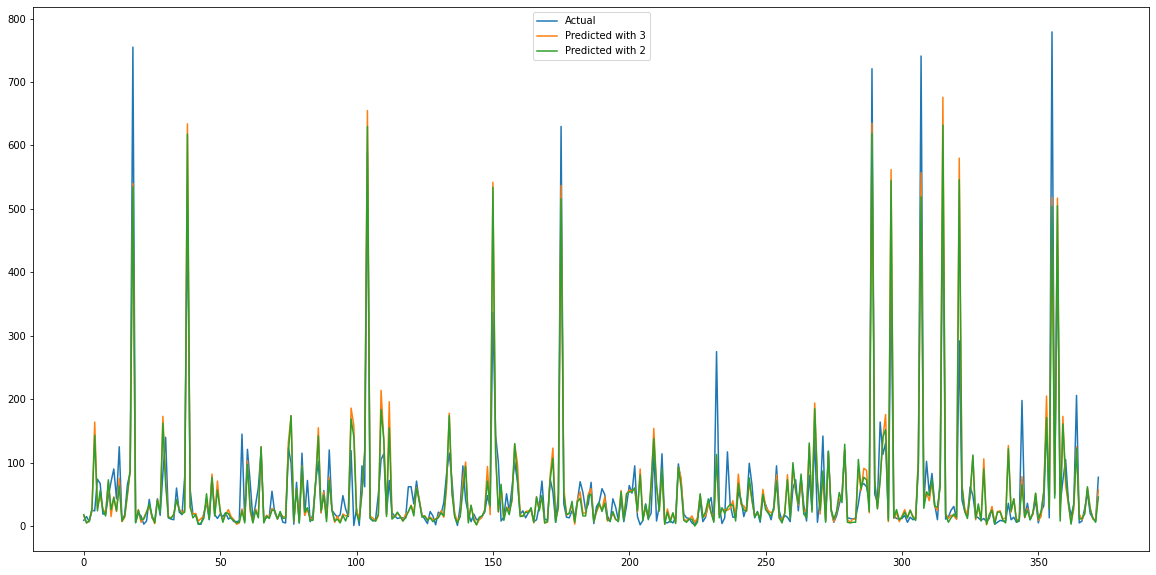

In [ ]:
#plt.plot(Y_valid, label='Actual')
#plt.plot(y_pred_3, label='Predicted with 3')
#plt.plot(y_pred_2, label='Predicted with 2')

#plt.legend()
#plt.show()

In [ ]:
mean_absolute_percentage_error(Y_valid, Y_pred_3)

0.9462481327359545

In [ ]:
# wmse(Y_valid,y_pred_3)

<tf.Tensor: shape=(), dtype=float64, numpy=2.7695326950927863>

In [ ]:
# cl = wmse(np.array(Y_valid),np.array(Y_pred_3))
# cl.numpy()

3.5546594

In [ ]:
from keras import backend as K
import tensorflow as tf
def use(ground_truth, predictions):
    errors = tf.math.abs(ground_truth - predictions) 
    weights = tf.ones_like(errors)
    mask = tf.less(predictions, ground_truth)
    weights =  K.switch(mask, weights * 1, 0)
    weighted_mse = K.mean(errors * weights/ground_truth)
    return weighted_mse

In [ ]:
use(Y_valid,Y_pred_3)

<tf.Tensor: shape=(), dtype=float64, numpy=0.18442072430225248>

Evedently Report

In [ ]:
train_f = pd.read_csv('/content/drive/MyDrive/Data-Storm-3.0/Semi/train.csv')
test_f = pd.read_csv('/content/drive/MyDrive/Data-Storm-3.0/Semi/test.csv')
val_f = pd.read_csv('/content/drive/MyDrive/Data-Storm-3.0/Semi/val.csv')

In [ ]:
train_f.head()

,CategoryCode,ItemCode,WeeklySales,DiscountValue,DiscountType,OnPromo,ind,Month,Year,Day,WeekNum,DateID
0,category_1,3418,18,0,No Discount,0,train,10,2021,1,1,10/1/2021
1,category_1,3427,2,0,No Discount,0,train,10,2021,1,1,10/1/2021
2,category_1,17287,2,0,No Discount,0,train,10,2021,1,1,10/1/2021
3,category_1,17296,28,0,No Discount,0,train,10,2021,1,1,10/1/2021
4,category_1,24136,4,10,Percentage,1,train,10,2021,1,1,10/1/2021


In [ ]:
train_f.drop('ind', axis=1, inplace=True)
val_f.drop('ind', axis=1, inplace=True)
test_f.drop('ind', axis=1, inplace=True)

In [ ]:
train_f['prediction'] = model_mlp.predict(X_train)
val_f['prediction'] = model_mlp.predict(X_valid)
test_f['prediction'] = model_mlp.predict(X_test)

In [ ]:
train_f.dtypes

CategoryCode      object
ItemCode           int64
WeeklySales        int64
DiscountValue      int64
DiscountType      object
OnPromo            int64
Month              int64
Year               int64
Day                int64
WeekNum            int64
DateID            object
prediction       float32
dtype: object

In [ ]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
train_f['DiscountType']= label_encoder.fit_transform(train_f['DiscountType'])
val_f['DiscountType']= label_encoder.transform(val_f['DiscountType']) 

train_f['CategoryCode']= label_encoder.fit_transform(train_f['CategoryCode'])
val_f['CategoryCode']= label_encoder.transform(val_f['CategoryCode']) 

In [ ]:
train_f.head()

,CategoryCode,ItemCode,WeeklySales,DiscountValue,DiscountType,OnPromo,Month,Year,Day,WeekNum,DateID,prediction
0,0,3418,18,0,1,0,10,2021,1,1,10/1/2021,0.936488
1,0,3427,2,0,1,0,10,2021,1,1,10/1/2021,2.091764
2,0,17287,2,0,1,0,10,2021,1,1,10/1/2021,2.007077
3,0,17296,28,0,1,0,10,2021,1,1,10/1/2021,34.188999
4,0,24136,4,10,2,1,10,2021,1,1,10/1/2021,4.621628


In [ ]:

from evidently import ColumnMapping
from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import RegressionPerformanceTab

from evidently.model_profile import Profile
from evidently.model_profile.sections import RegressionPerformanceProfileSection

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
target = 'WeeklySales'
prediction = 'prediction'
datetime = 'DateID'

numerical_features = ['DiscountValue', 'Day', 'Year', 'Month', 'WeekNum']
categorical_features = ['OnPromo', 'ItemCode', 'DiscountType', 'CategoryCode']

features = numerical_features + categorical_features

In [ ]:
column_mapping = ColumnMapping(target,
                               'prediction',
                               numerical_features=numerical_features,
                               categorical_features=categorical_features)

In [ ]:
dashboard = Dashboard(tabs=[RegressionPerformanceTab(verbose_level=1)])

In [ ]:
dashboard.calculate(train_f, val_f, column_mapping=column_mapping)

In [ ]:
dashboard.show()

In [ ]:
dashboard.save("my_report.html")